# Step-by-step calculation of basic statistics in genetics

To get a deep understanding of the basic statistics in genetics, we will try to calculate these statistcs from genotypes by ourselves in this notebook.

This notebook includes the calculation for the following plink options:

- `--missing`
- `--het`
- `--make-rel`
- `--pca`
- `--ld`


Let's load pandas first

In [1]:
import pandas as pd

## Calculate sample missing rate `--missing`

We will calculate the missing rate for the first sample (HG00403) in our dataset

### Extract all SNPs for the first sample

In [3]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"

# get the first 2 snps
cat ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam | awk 'NR>0 && NR<2 {print $1, $2}' > 1_sample.sample

plink2 \
        --bfile ${genotypeFile} \
        --export tped \
        --keep 1_sample.sample \
        --out 1_sample

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1_sample.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --export tped
  --keep 1_sample.sample
  --out 1_sample

Start time: Tue Apr 29 20:03:31 2025
15719 MiB RAM detected, ~14540 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--keep: 1 sample remaining.
1 sample (0 females, 0 males, 1 ambiguous; 1 founder) remaining after main
filters.
Writing 1_sample.tfam ... done.
--export tped to 1_sample.tped ... done.
End t

In [2]:
!head ./1_sample.sample

HG00403 HG00403


### Load extracted genotypes

The extracted data are in transposed ped (tped) format:

- row: SNPs
- columns after 3: alleles for samples

In [4]:
tped = pd.read_csv("1_sample.tped",sep="\s+",header=None)

In [5]:
tped

,0,1,2,3,4,5
0,1,1:14930:A:G,0,14930,G,A
1,1,1:15774:G:A,0,15774,G,G
2,1,1:15777:A:G,0,15777,A,A
3,1,1:57292:C:T,0,57292,C,C
4,1,1:77874:G:A,0,77874,G,G
...,...,...,...,...,...,...
1235111,22,22:51218377:G:C,0,51218377,G,G
1235112,22,22:51218615:T:A,0,51218615,T,T
1235113,22,22:51222073:C:G,0,51222073,C,C
1235114,22,22:51222100:G:T,0,51222100,G,G


In [6]:
total_number_of_snps = len(tped)

### Check number of missing SNPs

missing variants are labeled with 0

In [7]:
tped.loc[tped[4]=="0",:]

,0,1,2,3,4,5
335,1,1:1241529:A:G,0,1241529,0,0
398,1,1:1335922:C:T,0,1335922,0,0
532,1,1:1570660:T:C,0,1570660,0,0
706,1,1:1883677:C:G,0,1883677,0,0
780,1,1:1993688:T:G,0,1993688,0,0
...,...,...,...,...,...,...
1234372,22,22:50009095:T:C,0,50009095,0,0
1234702,22,22:50549277:T:G,0,50549277,0,0
1234729,22,22:50583104:A:G,0,50583104,0,0
1234843,22,22:50739442:T:C,0,50739442,0,0


In [8]:
number_of_missing_snps = len(tped.loc[tped[4]=="0",:])

### Calculate missing rate

In [9]:
missing_rate_for_HG00403  = number_of_missing_snps / total_number_of_snps
missing_rate_for_HG00403

0.008112598330845038

let's check with the results calculated by PLINK

In [10]:
!head -n 2 /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.imiss

      FID       IID MISS_PHENO   N_MISS   N_GENO   F_MISS
  HG00403   HG00403          Y    10020  1235116 0.008113


## Calculate SNP missing rate (`--missing`)

Let's then calculate the missing rate for the first SNP

### Extract the first SNP (1:14930:A:G) for all samples

In [11]:
!head ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim 

1	1:14930:A:G	0	14930	G	A
1	1:15774:G:A	0	15774	A	G
1	1:15777:A:G	0	15777	G	A
1	1:57292:C:T	0	57292	T	C
1	1:77874:G:A	0	77874	A	G
1	1:87360:C:T	0	87360	T	C
1	1:92917:T:A	0	92917	A	T
1	1:104186:T:C	0	104186	C	T
1	1:125271:C:T	0	125271	T	C
1	1:232449:G:A	0	232449	A	G


In [12]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"

# get the first 2 snps
echo "
1:14930:A:G
" > 1_snp.snplist

plink2 \
        --bfile ${genotypeFile} \
        --export ped \
        --extract 1_snp.snplist \
        --out 1_snp

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1_snp.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --export ped
  --extract 1_snp.snplist
  --out 1_snp

Start time: Tue Apr 29 20:03:33 2025
15719 MiB RAM detected, ~14314 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--extract: 1 variant remaining.
1 variant remaining after main filters.
Writing 1_snp.map ... done.
--export ped pass 1/1: writing... done.
--export ped: 1_snp.ped written.
End time: Tue Apr 29 20

In [13]:
ped = pd.read_csv("1_snp.ped",sep="\s+",header=None)
ped

,0,1,2,3,4,5,6,7
0,HG00403,HG00403,0,0,0,-9,G,A
1,HG00404,HG00404,0,0,0,-9,G,A
2,HG00406,HG00406,0,0,0,-9,G,A
3,HG00407,HG00407,0,0,0,-9,A,A
4,HG00409,HG00409,0,0,0,-9,G,A
...,...,...,...,...,...,...,...,...
499,NA19087,NA19087,0,0,0,-9,G,A
500,NA19088,NA19088,0,0,0,-9,A,A
501,NA19089,NA19089,0,0,0,-9,G,A
502,NA19090,NA19090,0,0,0,-9,G,A


### Check number of missing samples

In [14]:
ped.loc[ped[6]=="0",:]

,0,1,2,3,4,5,6,7
93,HG00692,HG00692,0,0,0,-9,0,0
467,NA19010,NA19010,0,0,0,-9,0,0


### Calculate missing rate

In [15]:
number_total_samples = len(ped)

In [16]:
missing_samples = len(ped.loc[ped[6]=="0",:])

In [17]:
missing_samples / number_total_samples

0.003968253968253968

Check out calculation with plink results

In [18]:
!head -n 2 /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.lmiss 

 CHR              SNP   N_MISS   N_GENO   F_MISS
   1      1:14930:A:G        2      504 0.003968


## Calculate allele frequency (`--frq`)

Let's then calculate the allele frequency for the first SNP using the same ped file

In [19]:
ped

,0,1,2,3,4,5,6,7
0,HG00403,HG00403,0,0,0,-9,G,A
1,HG00404,HG00404,0,0,0,-9,G,A
2,HG00406,HG00406,0,0,0,-9,G,A
3,HG00407,HG00407,0,0,0,-9,A,A
4,HG00409,HG00409,0,0,0,-9,G,A
...,...,...,...,...,...,...,...,...
499,NA19087,NA19087,0,0,0,-9,G,A
500,NA19088,NA19088,0,0,0,-9,A,A
501,NA19089,NA19089,0,0,0,-9,G,A
502,NA19090,NA19090,0,0,0,-9,G,A


number of alternative allele

In [20]:
n_alt = sum(ped[6]=="G") + sum(ped[7]=="G")
n_alt

415

number of reference allele

In [21]:
n_ref = sum(ped[6]=="A") + sum(ped[7]=="A")
n_ref

589

alternative allele frequency

In [22]:
n_alt / (n_ref + n_alt)

0.41334661354581675

Check with plink results

In [23]:
! head -n 2 "/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.afreq"

#CHROM	ID	REF	ALT	PROVISIONAL_REF?	ALT_FREQS	OBS_CT
1	1:14930:A:G	A	G	Y	0.413347	1004


## Calculate F coefficient (`--het`)

### load the tped file for the first sample

In [24]:
tped = pd.read_csv("1_sample.tped",sep="\s+",header=None)

### load the allele frequency data calculated from PLINK

In [25]:
frq = pd.read_csv("/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.afreq",sep="\t")
frq

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT
0,1,1:14930:A:G,A,G,Y,0.413347,1004
1,1,1:15774:G:A,G,A,Y,0.027944,1002
2,1,1:15777:A:G,A,G,Y,0.073852,1002
3,1,1:57292:C:T,C,T,Y,0.105422,996
4,1,1:77874:G:A,G,A,Y,0.019960,1002
...,...,...,...,...,...,...,...
1235111,22,22:51218377:G:C,G,C,Y,0.032934,1002
1235112,22,22:51218615:T:A,T,A,Y,0.032869,1004
1235113,22,22:51222073:C:G,C,G,Y,0.002000,1000
1235114,22,22:51222100:G:T,G,T,Y,0.038691,1008


### load pruned SNP list 

In [26]:
prune_in = pd.read_csv("/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in",sep="\t",header=None)
prune_in

,0
0,1:15774:G:A
1,1:15777:A:G
2,1:77874:G:A
3,1:87360:C:T
4,1:125271:C:T
...,...
218954,22:51176664:A:G
218955,22:51193227:T:G
218956,22:51197266:A:G
218957,22:51213613:C:T


### extract frequency for only pruned SNPs

In [27]:
frq_for_pruned_snps = frq.loc[frq["ID"].isin(prune_in[0])]
frq_for_pruned_snps

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT
1,1,1:15774:G:A,G,A,Y,0.027944,1002
2,1,1:15777:A:G,A,G,Y,0.073852,1002
4,1,1:77874:G:A,G,A,Y,0.019960,1002
5,1,1:87360:C:T,C,T,Y,0.022863,1006
8,1,1:125271:C:T,C,T,Y,0.969124,1004
...,...,...,...,...,...,...,...
1235092,22,22:51176664:A:G,A,G,Y,0.020833,1008
1235098,22,22:51193227:T:G,T,G,Y,0.018924,1004
1235100,22,22:51197266:A:G,A,G,Y,0.369048,1008
1235106,22,22:51213613:C:T,C,T,Y,0.071000,1000


### calculate expected homozygous genotype frrequency

In [28]:
frq_for_pruned_snps["Expected Homo"] = (frq_for_pruned_snps["ALT_FREQS"]**2 + (1-frq_for_pruned_snps["ALT_FREQS"])**2 )

/tmp/ipykernel_25783/2362946282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frq_for_pruned_snps["Expected Homo"] = (frq_for_pruned_snps["ALT_FREQS"]**2 + (1-frq_for_pruned_snps["ALT_FREQS"])**2 )


### exclude missing SNPs when calculate Fhet for each sample

In [29]:
missing_snps_for_HG00403 = tped.loc[tped[4]=="0",1]
missing_snps_for_HG00403

335          1:1241529:A:G
398          1:1335922:C:T
532          1:1570660:T:C
706          1:1883677:C:G
780          1:1993688:T:G
                ...       
1234372    22:50009095:T:C
1234702    22:50549277:T:G
1234729    22:50583104:A:G
1234843    22:50739442:T:C
1234894    22:50835040:G:A
Name: 1, Length: 10020, dtype: object

In [30]:
non_missing_pruned_snps_for_HG00403  = ~frq_for_pruned_snps["ID"].isin(missing_snps_for_HG00403)

### calculate expected homozygous genotype counts

In [31]:
frq_for_pruned_snps.loc[non_missing_pruned_snps_for_HG00403,"Expected Homo"]

1          0.945674
2          0.863204
4          0.960877
5          0.955320
8          0.940155
             ...   
1235092    0.959201
1235098    0.962868
1235100    0.534297
1235106    0.868082
1235115    0.932967
Name: Expected Homo, Length: 217363, dtype: float64

In [32]:
total_counts = len(frq_for_pruned_snps.loc[non_missing_pruned_snps_for_HG00403,"Expected Homo"])
total_counts

217363

In [33]:
expected_homo_counts = frq_for_pruned_snps.loc[non_missing_pruned_snps_for_HG00403,"Expected Homo"].sum()
expected_homo_counts

179580.48902693996

### calculate observed homozygous genotype counts

In [34]:
ped = ped.loc[ped[1].isin(frq_for_pruned_snps.loc[non_missing_pruned_snps_for_HG00403,"ID"]),:]
is_homo = ped[4] == ped[5]

In [35]:
observed_homo_counts = sum(is_homo)
observed_homo_counts

0

### calculate Fhet for HG00403

In [36]:
fhet_for_HG00403 = (observed_homo_counts - expected_homo_counts) / (total_counts - expected_homo_counts )
fhet_for_HG00403

-4.753005673841682

In [37]:
!head -n 2 /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.het

      FID       IID       O(HOM)       E(HOM)        N(NM)            F
  HG00403   HG00403       180222    1.796e+05       217363      0.01698


## Calculate genetic relationship matrix (`--make-rel`)

In [38]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"
prunedSNPs="/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in"

cat ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam | awk 'NR>0 && NR<101 {print $1, $2}' > 100_samples.sample

plink2 \
        --bfile ${genotypeFile} \
        --export A \
        --extract ${prunedSNPs} \
        --keep 100_samples.sample \
        --out prune_SNPs

plink2 \
        --bfile ${genotypeFile} \
        --extract ${prunedSNPs} \
        --keep 100_samples.sample \
        --freq \
        --out prune_SNPs

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to prune_SNPs.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --export A
  --extract /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in
  --keep 100_samples.sample
  --out prune_SNPs

Start time: Tue Apr 29 20:03:35 2025
15719 MiB RAM detected, ~13975 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--extract: 218959 variants remaining.
--keep: 100 samples remaining.
100 samples (0 females, 0 males, 100 ambi

### load genotypes and frequencies

In [39]:
raw = pd.read_csv("prune_SNPs.raw",sep="\t")
frq_for_pruned_snps = pd.read_csv("prune_SNPs.afreq",sep="\t")

In [40]:
raw.iloc[:,6:].T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1:15774:G:A_G,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1:15777:A:G_A,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1:77874:G:A_G,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1:87360:C:T_C,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
1:125271:C:T_C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:51176664:A:G_A,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
22:51193227:T:G_T,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
22:51197266:A:G_A,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0
22:51213613:C:T_C,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [41]:
frq_for_pruned_snps["REF_FREQS"] = 1 - frq_for_pruned_snps["ALT_FREQS"] 

In [42]:
frq_for_pruned_snps

,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT,REF_FREQS
0,1,1:15774:G:A,G,A,Y,0.005051,198,0.994949
1,1,1:15777:A:G,A,G,Y,0.091837,196,0.908163
2,1,1:77874:G:A,G,A,Y,0.000000,198,1.000000
3,1,1:87360:C:T,C,T,Y,0.035000,200,0.965000
4,1,1:125271:C:T,C,T,Y,0.984848,198,0.015152
...,...,...,...,...,...,...,...,...
218954,22,22:51176664:A:G,A,G,Y,0.020000,200,0.980000
218955,22,22:51193227:T:G,T,G,Y,0.015152,198,0.984849
218956,22,22:51197266:A:G,A,G,Y,0.350000,200,0.650000
218957,22,22:51213613:C:T,C,T,Y,0.075758,198,0.924242


In [43]:
raw_frq = pd.concat([raw.iloc[:,6:].T.reset_index(), frq_for_pruned_snps.reset_index()],axis=1)
raw_frq

,index,0,1,2,3,4,5,6,7,8,...,99,index,#CHROM,ID,REF,ALT,PROVISIONAL_REF?,ALT_FREQS,OBS_CT,REF_FREQS
0,1:15774:G:A_G,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0,1,1:15774:G:A,G,A,Y,0.005051,198,0.994949
1,1:15777:A:G_A,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1,1,1:15777:A:G,A,G,Y,0.091837,196,0.908163
2,1:77874:G:A_G,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,2.0,2,1,1:77874:G:A,G,A,Y,0.000000,198,1.000000
3,1:87360:C:T_C,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3,1,1:87360:C:T,C,T,Y,0.035000,200,0.965000
4,1:125271:C:T_C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,1,1:125271:C:T,C,T,Y,0.984848,198,0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218954,22:51176664:A:G_A,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,218954,22,22:51176664:A:G,A,G,Y,0.020000,200,0.980000
218955,22:51193227:T:G_T,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,218955,22,22:51193227:T:G,T,G,Y,0.015152,198,0.984849
218956,22:51197266:A:G_A,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,...,0.0,218956,22,22:51197266:A:G,A,G,Y,0.350000,200,0.650000
218957,22:51213613:C:T_C,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,...,2.0,218957,22,22:51213613:C:T,C,T,Y,0.075758,198,0.924242


In [44]:
import numpy as np

In [45]:
g01 = 0
m=0
not_na = (~raw_frq[0].isna()) & (~raw_frq[1].isna())

for i, row in raw_frq.loc[not_na,:].iterrows():
    m+=1
    if row[0] is not np.nan and row[1] is not np.nan and row["REF_FREQS"]>0 and row["REF_FREQS"]<1:
        
        g01+= ((row[0] - 2*row["REF_FREQS"]) * (row[1] - 2*row["REF_FREQS"])) / (2*(row["REF_FREQS"] * (1- row["REF_FREQS"])))
g01

-1846.5310808647475

In [46]:
m

215964

calculate the genetic relationship between the firts two samples

In [47]:
g01 / m 

-0.00855018003400913

check with plink results

In [48]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"
prunedSNPs="/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in"
cat ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam | awk 'NR>0 && NR<3 {print $1, $2}' > 100_samples.sample

plink2 \
  --bfile ${genotypeFile} \
  --extract ${prunedSNPs} \
  --keep 100_samples.sample \
  --read-freq prune_SNPs.afreq \
  --make-rel square \
  --out 100_samples

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 100_samples.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in
  --keep 100_samples.sample
  --make-rel square
  --out 100_samples
  --read-freq prune_SNPs.afreq

Start time: Tue Apr 29 20:04:43 2025
15719 MiB RAM detected, ~11440 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--extract: 218959 variants remaining.
--keep: 2 samples remaining.
2 s

In [49]:
!head -n 100 100_samples.rel 

0.935702	-0.00855018
-0.00855018	0.94405


## Conduct PCA (`--pca`)

### get the genetic relationship matrix

to make it simple, we simply use all samples and the pruned SNPs to calculate the GRM

In [50]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"
prunedSNPs="/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in"

plink2 \
  --bfile ${genotypeFile} \
  --extract ${prunedSNPs} \
  --make-rel square \
  --out 500_samples

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 500_samples.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract /home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.in
  --make-rel square
  --out 500_samples

Start time: Tue Apr 29 20:04:44 2025
15719 MiB RAM detected, ~11438 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--extract: 218959 variants remaining.
Calculating allele frequencies... done.
218959 variants remaining after main filters.
Const

In [51]:
genetic_relationship_matrix = pd.read_csv("500_samples.rel",sep="\t",header=None)
genetic_relationship_matrix

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,0.944773,0.001952,0.002295,-0.000641,-0.002308,0.004454,0.000110,0.000741,-0.000136,0.001755,...,-0.008060,-0.004440,-0.002531,-0.005839,-0.009276,-0.007200,-0.001007,-0.006744,-0.002390,-0.005648
1,0.001952,0.968927,0.003579,0.006447,0.000497,0.002748,-0.000306,0.000265,0.001013,0.001975,...,-0.007207,-0.004188,-0.003543,-0.005184,-0.007384,-0.005394,-0.002854,-0.010061,-0.004958,-0.005830
2,0.002295,0.003579,0.985393,0.005059,-0.004089,-0.000408,0.002268,-0.003933,0.002837,-0.000696,...,-0.009294,-0.008990,0.000385,-0.004667,-0.003952,-0.006999,-0.012471,-0.003008,-0.008676,-0.005571
3,-0.000641,0.006447,0.005059,0.977355,-0.004660,-0.001247,-0.000721,0.000880,-0.001316,0.003797,...,-0.008187,-0.005303,-0.006716,-0.007792,-0.006291,-0.007039,-0.005989,-0.003347,-0.003377,-0.001690
4,-0.002308,0.000497,-0.004089,-0.004660,1.009790,0.017546,-0.003062,0.002415,0.000047,-0.002585,...,-0.002340,-0.008591,-0.006755,-0.003923,-0.005489,-0.008085,-0.007344,0.000221,-0.003805,-0.004865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,-0.007200,-0.005394,-0.006999,-0.007039,-0.008085,-0.006137,-0.006954,-0.007323,-0.007331,-0.006021,...,0.015404,0.032417,0.027312,0.022651,0.025075,1.036680,0.032096,0.018728,0.018567,0.021212
500,-0.001007,-0.002854,-0.012471,-0.005989,-0.007344,-0.007175,-0.004257,-0.009276,-0.008775,-0.006938,...,0.015434,0.032246,0.028042,0.028792,0.025286,0.032096,1.029980,0.023404,0.015324,0.028789
501,-0.006744,-0.010061,-0.003008,-0.003347,0.000221,-0.003714,-0.005594,-0.005234,-0.006967,-0.005761,...,0.026019,0.023289,0.016022,0.029758,0.027173,0.018728,0.023404,1.042300,0.026803,0.023118
502,-0.002390,-0.004958,-0.008676,-0.003377,-0.003805,-0.001460,-0.005129,-0.002610,-0.011031,-0.007373,...,0.016910,0.016319,0.021141,0.018588,0.018521,0.018567,0.015324,0.026803,1.031090,0.019927


### get Eigenvalues and Eigenvectors

In [52]:
import numpy as np

In [53]:
values, vectors = np.linalg.eig(genetic_relationship_matrix)

In [54]:
vectors

array([[-0.0018594 , -0.03357044,  0.04454128, ...,  0.01408722,
         0.00598374, -0.00233155],
       [ 0.00040214, -0.04018002,  0.04453263, ...,  0.02711142,
         0.0372924 ,  0.05326154],
       [-0.00603496, -0.0417265 ,  0.04455733, ...,  0.05978254,
        -0.02580678,  0.00915836],
       ...,
       [ 0.07765471,  0.0496504 ,  0.04454395, ...,  0.05626591,
        -0.11940941,  0.00782296],
       [ 0.06536453,  0.03709056,  0.04453418, ..., -0.05596371,
        -0.05756407,  0.03643117],
       [ 0.07436629,  0.05609041,  0.04455033, ...,  0.05727061,
         0.03349336,  0.12752641]])

### sort the results

In [55]:
sorted_indices = np.argsort(values)[::-1]
values_sorted = values[sorted_indices]
vectors_sorted = vectors[:,sorted_indices]

### projection

In [56]:
pca_components = vectors_sorted[:, :2]
projected_data = np.dot(genetic_relationship_matrix, pca_components)

### visualization

In [57]:
import matplotlib.pyplot as plt

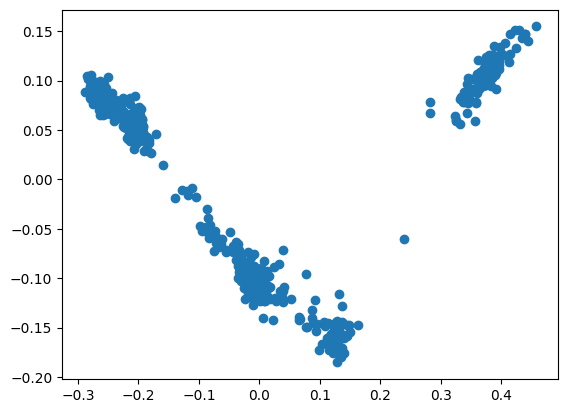

In [58]:
plt.scatter(projected_data[:,0],projected_data[:,1])

## Calculate pair-wise LD `--ld`

In [59]:
!head "/home/yunye/work/GWASTutorial/04_Data_QC/plink_results.prune.out"

1:568256:C:T
1:702142:G:C
1:715517:G:C
1:720240:T:C
1:724324:G:A
1:726917:A:G
1:727244:T:C
1:731062:C:T
1:741267:T:C
1:742594:C:T


In [60]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"

# get the first 2 snps
echo "
1:726917:A:G
1:727244:T:C
" > 2_snps.snplist

plink2 \
        --bfile ${genotypeFile} \
        --export A \
        --extract 2_snps.snplist \
        --out 2_snps

PLINK v2.0.0-a.6.12LM AVX2 Intel (20 Apr 2025)     cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 2_snps.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --export A
  --extract 2_snps.snplist
  --out 2_snps

Start time: Tue Apr 29 20:04:49 2025
15719 MiB RAM detected, ~11358 available; reserving 7859 MiB for main
workspace.
Using up to 22 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.fam.
1235116 variants loaded from
../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing.bim.
Note: No phenotype data present.
--extract: 2 variants remaining.
2 variants remaining after main filters.
--export A pass 1/1: writing... done.
--export A: 2_snps.raw written.
End time: Tue Apr 29 20:04:49 2025


### load the genotype data

In [61]:
snps = pd.read_csv("2_snps.raw",sep="\t")
snps

,FID,IID,PAT,MAT,SEX,PHENOTYPE,1:726917:A:G_A,1:727244:T:C_T
0,HG00403,HG00403,0,0,0,-9,2.0,2.0
1,HG00404,HG00404,0,0,0,-9,2.0,2.0
2,HG00406,HG00406,0,0,0,-9,2.0,2.0
3,HG00407,HG00407,0,0,0,-9,2.0,2.0
4,HG00409,HG00409,0,0,0,-9,2.0,2.0
...,...,...,...,...,...,...,...,...
499,NA19087,NA19087,0,0,0,-9,2.0,2.0
500,NA19088,NA19088,0,0,0,-9,2.0,1.0
501,NA19089,NA19089,0,0,0,-9,2.0,NaN
502,NA19090,NA19090,0,0,0,-9,2.0,2.0


### calculate pearson correlation r2

In [62]:
snps[["1:726917:A:G_A","1:727244:T:C_T"]].corr()**2

,1:726917:A:G_A,1:727244:T:C_T
1:726917:A:G_A,1.000000,0.360649
1:727244:T:C_T,0.360649,1.000000


### check plink calculation results

In [63]:
%%bash
genotypeFile="../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing"

plink \
        --bfile ${genotypeFile} \
        --extract 2_snps.snplist \
        --r2 \
        --out 2_snps

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 2_snps.log.
Options in effect:
  --bfile ../01_Dataset/1KG.EAS.auto.snp.norm.nodup.split.rare002.common015.missing
  --extract 2_snps.snplist
  --out 2_snps
  --r2

15719 MB RAM detected; reserving 7859 MB for main workspace.
1235116 variants loaded from .bim file.
504 people (0 males, 0 females, 504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to 2_snps.nosex .
--extract: 2 variants remaining.
Using up to 21 threads (change this with --threads).
Before main variant filters, 504 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.992063.
2 variants and 504 people pass filters and QC.
Note: No phenotypes present.
Running --r2 with the following filters:
  --ld-window: 10
  --ld-window-kb: 1000
  --ld-window-r2: 0.2
--r2 to 2_snps.ld ... done.


In [64]:
! head 2_snps.ld

 CHR_A         BP_A          SNP_A  CHR_B         BP_B          SNP_B           R2 
     1       726917   1:726917:A:G      1       727244   1:727244:T:C     0.360649 
